참고 소스 : https://github.com/therealcyberlord/coronavirus_visualization_and_prediction/blob/master/coronavirus-covid-19-visualization-prediction.ipynb

데이터 : https://github.com/CSSEGISandData/COVID-19

홉킨스 데이터는 매일 9시 정도에 업데이트 됨

In [1]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline


In [2]:
# 존스 홉킨스 데이터 다운로드
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,853,853,853,853,854,854,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,118,130,138,140,142,148,155,166,172,176


In [3]:
cols = confirmed_df.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/11/20', '6/12/20', '6/13/20', '6/14/20', '6/15/20', '6/16/20',
       '6/17/20', '6/18/20', '6/19/20', '6/20/20'],
      dtype='object', length=155)

In [4]:
# 일일 데이터만 추출('Province/State', 'Country/Region', 'Lat', 'Long' 컬럼 제외)
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]


In [5]:
dates = confirmed.keys()
print(dates)
adjusted_dates = np.array([i for i in range(len(dates))]).reshape(-1, 1)


Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/11/20', '6/12/20', '6/13/20', '6/14/20', '6/15/20', '6/16/20',
       '6/17/20', '6/18/20', '6/19/20', '6/20/20'],
      dtype='object', length=151)


In [6]:
latest_confirmed = confirmed_df[dates[-1]]
latest_deaths = deaths_df[dates[-1]]
latest_recoveries = recoveries_df[dates[-1]]


오늘    : 6/20/20
31번    : 2/18/20
용인66번: 5/6/20


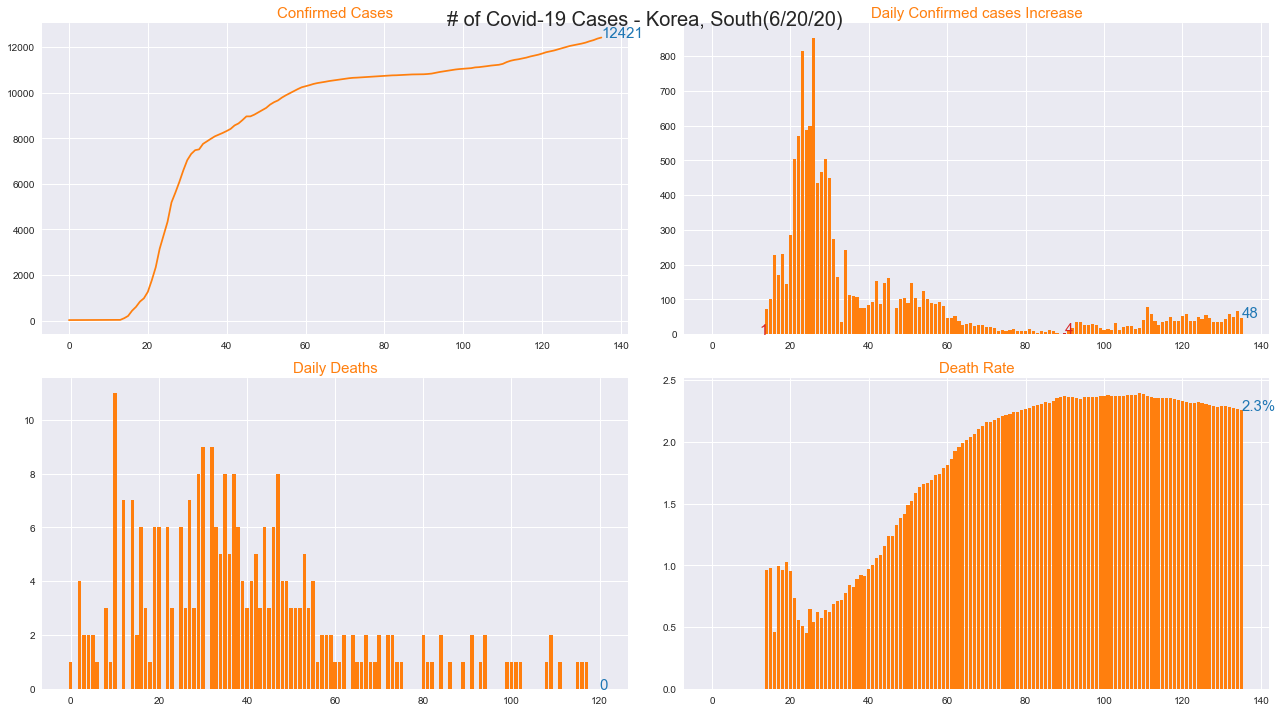

In [7]:
# country = 'Korea, South'
# adjusted_dates = np.array([i for i in range(len(dates))]).reshape(-1, 1)
# adjusted_dates = adjusted_dates[20:]
# plt.figure(figsize=(20, 7))
# country_confirmed_cases = confirmed_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
# country_confirmed_cases = country_confirmed_cases.values.reshape(len(dates))
# plt.plot(adjusted_dates, country_confirmed_cases[20:])

# country_recovered_cases = recoveries_df.loc[recoveries_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
# country_recovered_cases = country_recovered_cases.values.reshape(len(dates))
# plt.plot(adjusted_dates, country_recovered_cases[20:])

# country_deaths_cases = deaths_df.loc[deaths_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
# country_deaths_cases = country_deaths_cases.values.reshape(len(dates))
# plt.plot(adjusted_dates, country_deaths_cases[20:])

# infected = [(confirmed - recovered - death) for confirmed, recovered, death in zip(country_confirmed_cases, country_recovered_cases, country_deaths_cases)]
# plt.plot(adjusted_dates, infected[20:])

# plt.title('# of Covid-19 Cases - Korea, South', size=20)
# plt.xlabel('Days since 1/22/2020', size=20)
# plt.ylabel('# Cases', size=20)
# plt.annotate(xy=(len(dates)-1, country_confirmed_cases[-1]*0.95), s='Confirmed\n{}'.format(country_confirmed_cases[-1]), size=15)
# plt.annotate(xy=(len(dates)-1, country_recovered_cases[-1]*0.95), s='Recovered\n{}'.format(country_recovered_cases[-1]), size=15)
# plt.annotate(xy=(len(dates)-1, country_deaths_cases[-1]*0.95), s='Deaths\n{}'.format(country_deaths_cases[-1]), size=15)
# plt.annotate(xy=(len(dates)-1, infected[-1]*0.95), s='Not recovered\n{}'.format(infected[-1]), size=15)
# plt.xticks(size=15)

print('오늘    :', dates[-1])
#2/18일 31번확진자
date_31 = -124
print('31번    :', dates[date_31])
#5/6일 용인66번확진자
date_66 = date_31 + 78
print('용인66번:', dates[date_66])
country = 'Korea, South'
start = 15
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('# of Covid-19 Cases - Korea, South' + '(' + dates[-1] + ')', size=20)
total_cases = confirmed_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
total_cases = total_cases.values.reshape(len(dates))
total_cases = total_cases[start:]
new_cases =[0]
for i, case in enumerate(total_cases[:-1]):
    new_cases.append(total_cases[i + 1] - total_cases[i])
new_cases = new_cases
color = 'tab:orange'
adjusted_dates = [i for i in range(len(total_cases))]
#axs[0, 0].set_yscale('log')
axs[0, 0].plot(adjusted_dates, total_cases, color=color)
axs[0, 0].set_title('Confirmed Cases', size=15, color=color)
axs[0, 0].text(adjusted_dates[-1], total_cases[-1], total_cases[-1],size=15, color='tab:blue')

adjusted_dates = [i for i in range(len(new_cases))]
axs[0, 1].bar(adjusted_dates, new_cases, color=color)
axs[0, 1].bar(adjusted_dates[date_31], new_cases[date_31], color='tab:red')
axs[0, 1].bar(adjusted_dates[date_66], new_cases[date_66], color='tab:red')
axs[0, 1].set_title('Daily Confirmed cases Increase', size=15, color=color)
axs[0, 1].text(adjusted_dates[-1], new_cases[-1], new_cases[-1],size=15, color='tab:blue')
axs[0, 1].text(adjusted_dates[date_31], new_cases[date_31], new_cases[date_31],size=15, color='tab:red')
axs[0, 1].text(adjusted_dates[date_66], new_cases[date_66], new_cases[date_66],size=15, color='tab:red')

total_deaths = deaths_df.loc[deaths_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
total_deaths = total_deaths.values.reshape(len(dates))
total_deaths = total_deaths[start:]
death_ratios = [(d * 100 / c) for c, d in zip(total_cases, total_deaths)]
total_deaths = [death for death in total_deaths if death > 0]
new_deaths =[]
for i, case in enumerate(total_deaths[:-1]):
    new_deaths.append(total_deaths[i + 1] - total_deaths[i])
adjusted_dates = [i for i in range(len(new_deaths))]
axs[1, 0].bar(adjusted_dates, new_deaths, color=color)
axs[1, 0].set_title('Daily Deaths', size=15, color=color)
axs[1, 0].text(adjusted_dates[-1], new_deaths[-1], new_deaths[-1],size=15, color='tab:blue')

adjusted_dates = [i for i in range(len(death_ratios))]
axs[1, 1].bar(adjusted_dates, death_ratios, color=color)
axs[1, 1].set_title('Death Rate', size=15, color=color)
axs[1, 1].text(adjusted_dates[-1], death_ratios[-1], '{:.1f}%'.format(death_ratios[-1]),size=15, color='tab:blue')

fig.tight_layout()


In [12]:
# 국가 리스트 및 국가별 인구 수
TOP_N = 20  # 확진자 상위 국가 N
unique_countries = list(confirmed_df['Country/Region'].unique())
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_df['Country/Region'] == i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i)

unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
top_countries = unique_countries[:TOP_N]

print(top_countries)

population = {
 'China':1399620000,
 'Italy':60278616,
 'US':330093000,
 'Spain':46934632,
 'Germany':83073100,
 'Iran':82878200,
 'France':67055000,
 'Korea, South':51851427,
 'Switzerland':8544034,
 'United Kingdom':66435600,
 'Netherlands':17084459,
 'Japan':126150000,
 'Netherlands':17084459,
 'Austria':8751820,
 'Belgium':11498519,
 'Canada':36954000,
 'Turkey':82600000,
 'Portugal':10291027,
 'Brazil':374563873,
 'Israel':9033730,
 'Sweden':10255102,
 'Norway':5334762,
 'Australia':25371700,
 'Russia' : 145000000,
 'India' : 1353000000,
 'Ireland' : 40000000,
 'Peru': 31000000,
 'Ecuador': 17000000,
 'Saudi Arabia': 33700000,
 'Mexico': 126200000,
 'Pakistan': 212200000,
 'Chile' : 18730000,
 'Qatar' : 2782000,
 'Bangladesh' : 161400000,
}


['US', 'Brazil', 'Russia', 'India', 'United Kingdom', 'Spain', 'Italy', 'Peru', 'France', 'Iran', 'Germany', 'Chile', 'Turkey', 'Mexico', 'Pakistan', 'Saudi Arabia', 'Canada', 'Bangladesh', 'China', 'Qatar']


In [9]:
for i in range(len(top_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_df['Country/Region'] == top_countries[i]].sum()
visual_unique_countries = []
visual_confirmed_cases = []
for i in range(len(country_confirmed_cases[:TOP_N])):
    visual_unique_countries.append(top_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

list(zip(visual_unique_countries, visual_confirmed_cases))

[('US', 2137731),
 ('Brazil', 923189),
 ('Russia', 544725),
 ('India', 354065),
 ('United Kingdom', 299600),
 ('Spain', 244328),
 ('Italy', 237500),
 ('Peru', 237156),
 ('France', 194347),
 ('Iran', 192439),
 ('Germany', 188252),
 ('Chile', 184449),
 ('Turkey', 181298),
 ('Mexico', 154863),
 ('Pakistan', 154760),
 ('Saudi Arabia', 136315),
 ('Canada', 101087),
 ('Bangladesh', 94481),
 ('China', 84422),
 ('Qatar', 82077)]

국가별 누적 확진자 수평 막대 그래프

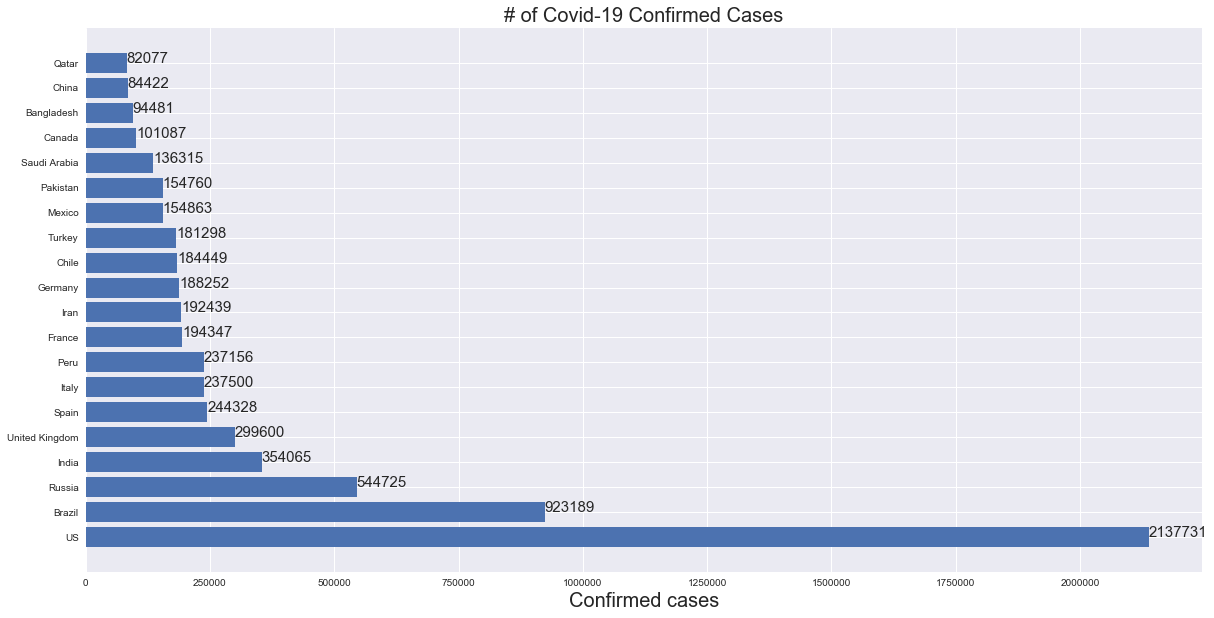

In [10]:
plt.figure(figsize=(20, 10))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.xlabel('Confirmed cases', size=20)
plt.title('# of Covid-19 Confirmed Cases', size=20)
for i, case in enumerate(visual_confirmed_cases):
    plt.annotate(xy=[case + 100,i], s=case, size=15)

인구 수 10만명 당 확진자 수

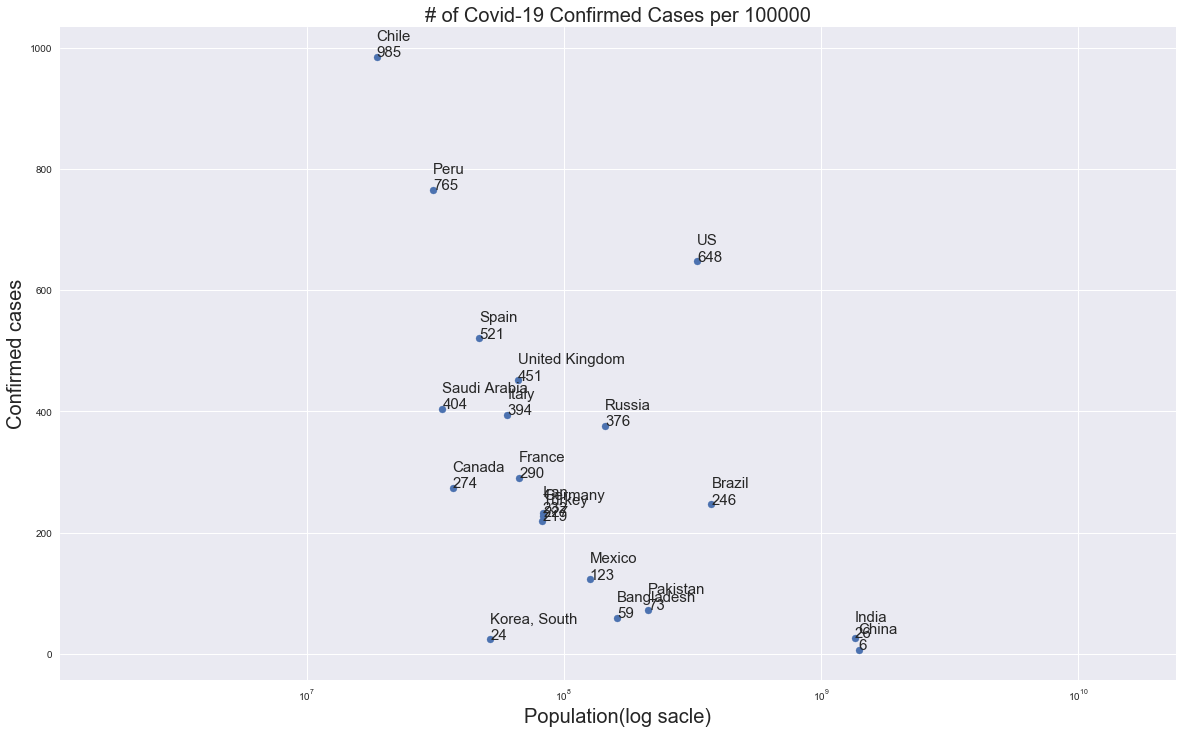

In [34]:
plt.figure(figsize=(20, 12))
v_unique_countries = unique_countries[:20]
v_unique_countries = visual_unique_countries + ['Korea, South']
v_unique_countries.remove('Qatar')
visual_confirmed_cases = []
for i in range(len(v_unique_countries)):
    visual_confirmed_cases.append(latest_confirmed[confirmed_df['Country/Region'] == v_unique_countries[i]].sum())
population_confirmed_cases = []
populations = []
for country, case in zip(v_unique_countries, visual_confirmed_cases):
    population_confirmed_cases.append(case * 100000 / population[country])
    populations.append(population[country])
plt.xlabel('Population(log sacle)', size=20)
plt.ylabel('Confirmed cases', size=20)
plt.xscale('log')
plt.scatter(populations, population_confirmed_cases)
plt.title('# of Covid-19 Confirmed Cases per 100000', size=20)
for c, p, case in zip(v_unique_countries, populations, population_confirmed_cases):
    plt.annotate(xy=[p, case + 1], s='{}\n{:.0f}'.format(c, case), size=15)

국가별 사망률

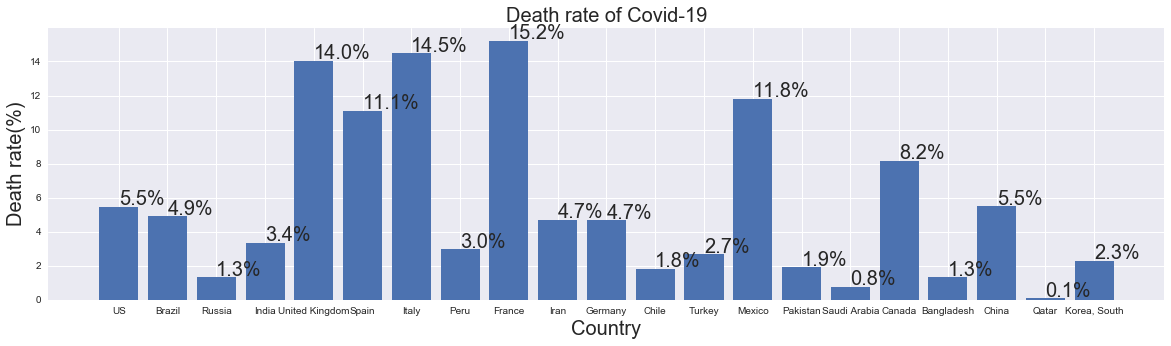

In [35]:
plt.figure(figsize=(20, 5))
v_unique_countries = visual_unique_countries
v_unique_countries = visual_unique_countries + ['Korea, South']
visual_confirmed_cases = []
for i in range(len(v_unique_countries)):
    visual_confirmed_cases.append(latest_confirmed[confirmed_df['Country/Region'] == v_unique_countries[i]].sum())
death_ratios = []
for i in range(len(v_unique_countries)):
    ratio = (latest_deaths[deaths_df['Country/Region'] == v_unique_countries[i]].sum() * 100)  / latest_confirmed[confirmed_df['Country/Region'] == v_unique_countries[i]].sum()
    death_ratios.append(ratio)

plt.bar(v_unique_countries, death_ratios)
plt.xlabel('Country', size=20)
plt.ylabel('Death rate(%)', size=20)
plt.title('Death rate of Covid-19', size=20)
for i, ratio in enumerate(death_ratios):
    plt.annotate(xy=[i, ratio + 0.1], s='{:.1f}%'.format(ratio), size=20)


국가별 확진자 상대 비율(파이 챠트)

[2137731, 923189, 544725, 354065, 299600, 244328, 237500, 237156, 194347, 192439, 188252, 184449, 181298, 154863, 154760, 136315, 101087, 94481, 84422, 82077, 12198]


Text(0.5, 1.0, 'Ratio of Covid-19 Confirmed Cases')

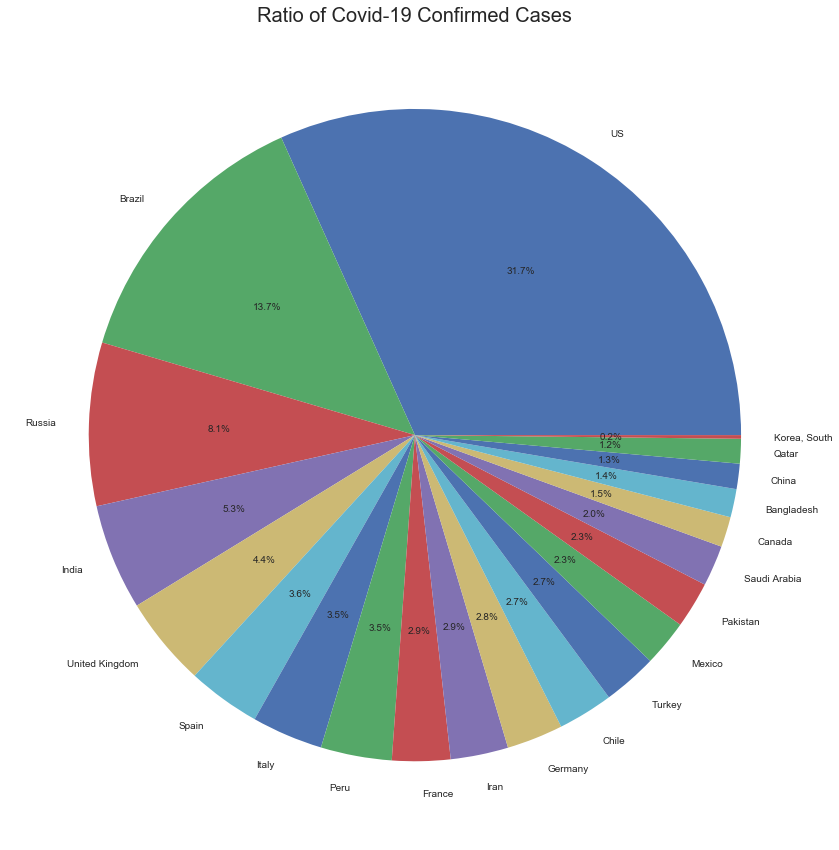

In [36]:
print(visual_confirmed_cases)
plt.figure(figsize=(20, 15))
plt.pie(visual_confirmed_cases, labels=v_unique_countries,autopct='%1.1f%%')
plt.title('Ratio of Covid-19 Confirmed Cases', size=20)

전체 누적 확진자 및 신규 확진자

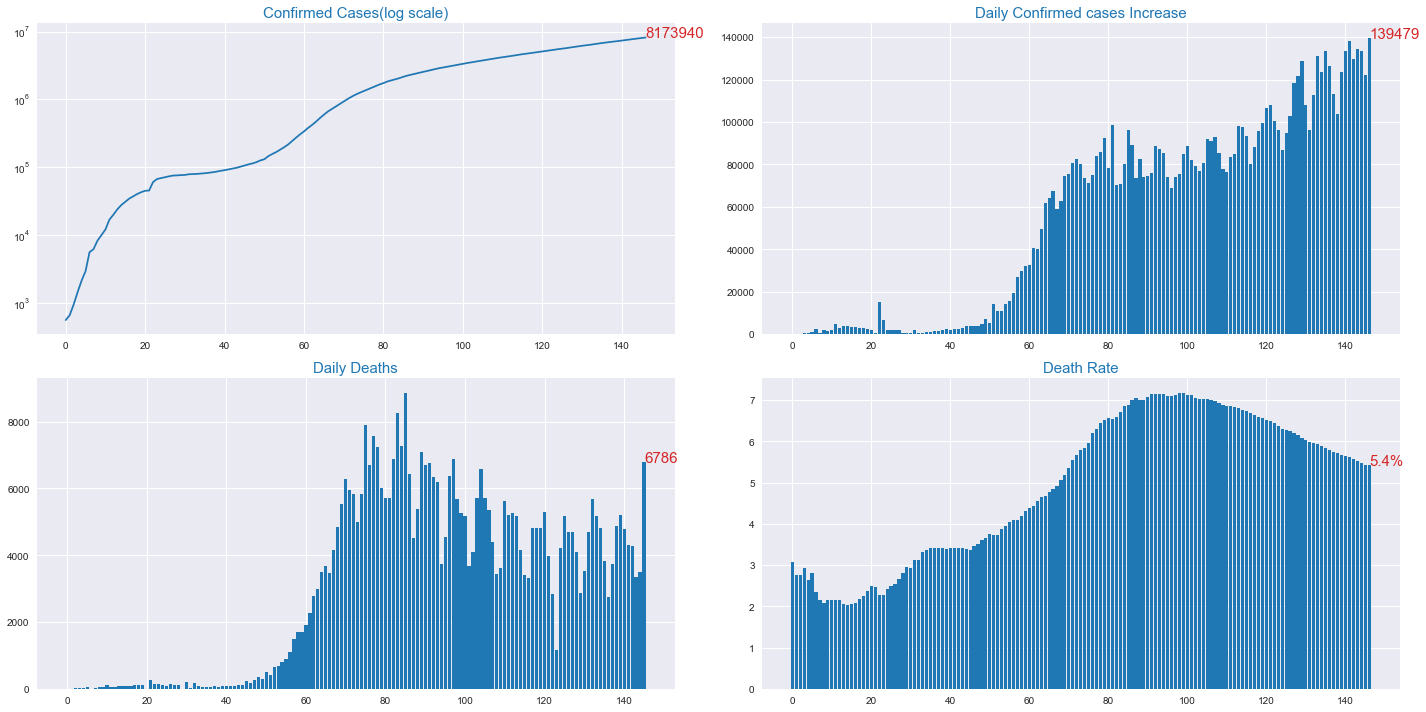

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
total_cases = confirmed.sum()
new_cases =[0]
for i, case in enumerate(total_cases[:-1]):
    new_cases.append(total_cases[i + 1] - total_cases[i])
new_cases = new_cases
color = 'tab:blue'
adjusted_dates = [i for i in range(len(dates))]
axs[0, 0].set_yscale('log')
axs[0, 0].plot(adjusted_dates, total_cases, color=color)
axs[0, 0].set_title('Confirmed Cases(log scale)', size=15, color=color)
axs[0, 0].text(adjusted_dates[-1], total_cases[-1], total_cases[-1],size=15, color='tab:red')

adjusted_dates = [i for i in range(len(new_cases))]
axs[0, 1].bar(adjusted_dates, new_cases, color=color)
axs[0, 1].set_title('Daily Confirmed cases Increase', size=15, color=color)
axs[0, 1].text(adjusted_dates[-1], new_cases[-1], new_cases[-1],size=15, color='tab:red')

total_deaths = deaths.sum()
death_ratios = [(d * 100 / c) for c, d in zip(total_cases, total_deaths)]
total_deaths = [death for death in total_deaths if death > 0]
new_deaths =[]
for i, case in enumerate(total_deaths[:-1]):
      new_deaths.append(total_deaths[i + 1] - total_deaths[i])
adjusted_dates = [i for i in range(len(new_deaths))]
axs[1, 0].bar(adjusted_dates, new_deaths, color=color)
axs[1, 0].set_title('Daily Deaths', size=15, color=color)
axs[1, 0].text(adjusted_dates[-1], new_deaths[-1], new_deaths[-1],size=15, color='tab:red')

adjusted_dates = [i for i in range(len(death_ratios))]
axs[1, 1].bar(adjusted_dates, death_ratios, color=color)
axs[1, 1].set_title('Death Rate', size=15, color=color)
axs[1, 1].text(adjusted_dates[-1], death_ratios[-1], '{:.1f}%'.format(death_ratios[-1]),size=15, color='tab:red')

fig.tight_layout()


국가별 신규 확진자 추이

6/16/20


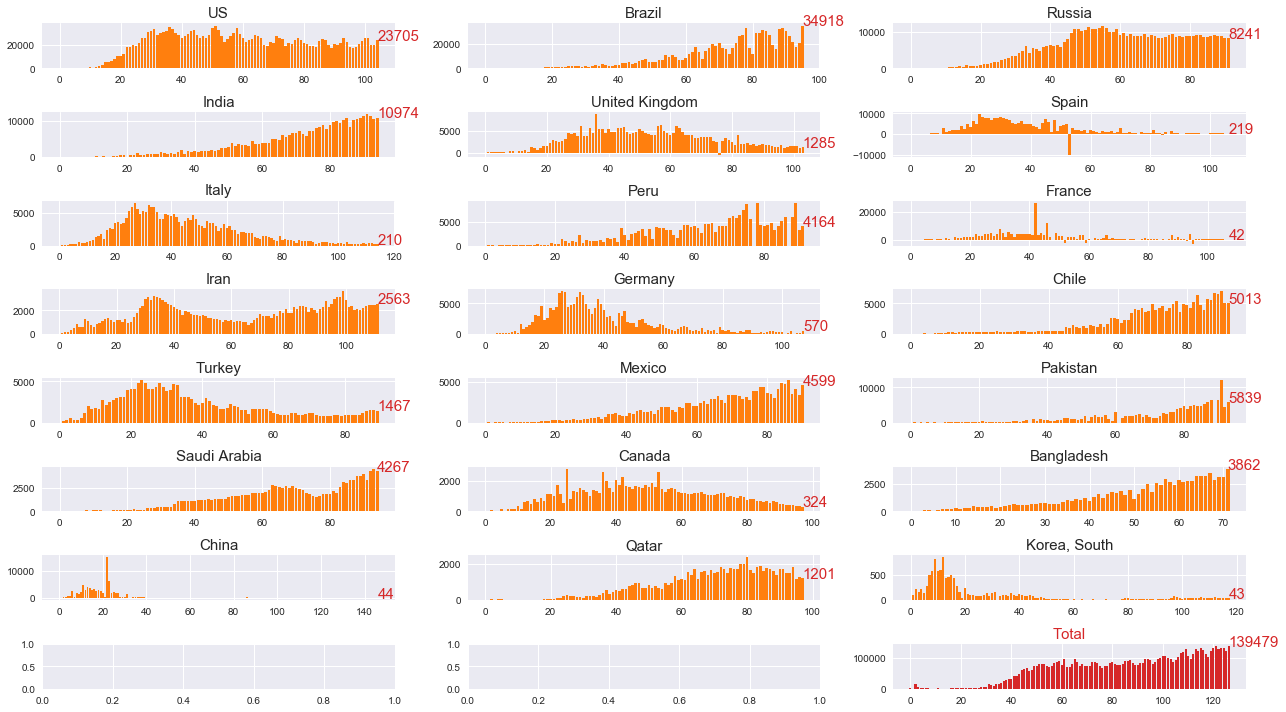

In [38]:
print(dates[-1])
color = 'tab:orange'
fig, axs = plt.subplots(8, 3, figsize=(18, 10))
#fig.suptitle('# of Covid-19 Daily Increase', size=10)
for index, country in enumerate(v_unique_countries):
    cases = confirmed_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
    cases = [c for c in cases if c > 100]
    adjusted_dates = [i for i in range(len(cases))]
    new_cases =[0]
    for i, case in enumerate(cases[:-1]):
        new_cases.append(cases[i + 1] - cases[i])
    row, col = divmod(index, 3)
    axs[row, col].bar(adjusted_dates, new_cases, color=color)
    axs[row, col].set_title(country, size=15)
    axs[row, col].text(adjusted_dates[-1], new_cases[-1], new_cases[-1],size=15, color='tab:red')

color = 'tab:red'
total_cases = confirmed.sum()
new_cases =[0]
for i, case in enumerate(total_cases[:-1]):
    new_cases.append(total_cases[i + 1] - total_cases[i])
new_cases = new_cases[20:]
adjusted_dates = [i for i in range(len(new_cases))]
axs[7, 2].bar(adjusted_dates, new_cases, color=color)
axs[7, 2].set_title('Total', size=15, color=color)
axs[7, 2].text(adjusted_dates[-1], new_cases[-1], new_cases[-1],size=15, color=color)

fig.tight_layout()

국가별 누적 확진자 증가율

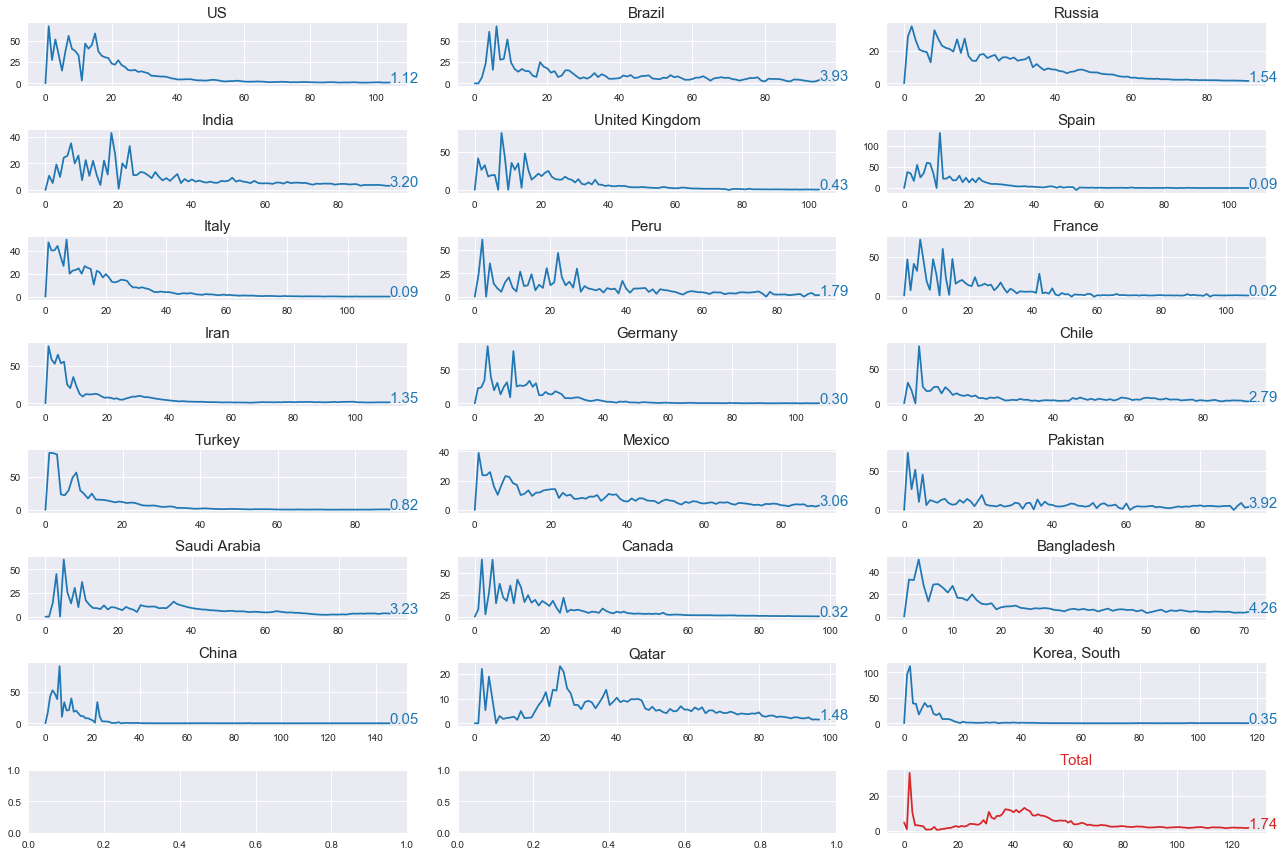

In [39]:
color = 'tab:blue'
fig, axs = plt.subplots(8, 3, figsize=(18, 12))
#fig.suptitle('# of Covid-19 Daily Increase', size=10)
for index, country in enumerate(v_unique_countries):
    cases = confirmed_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
    cases = [c for c in cases if c > 100]
    adjusted_dates = [i for i in range(len(cases))]
    new_cases =[0]
    for i, case in enumerate(cases[:-1]):
        new_cases.append((cases[i + 1] - cases[i]) * 100 / cases[i])
    row, col = divmod(index, 3)
    axs[row, col].plot(adjusted_dates, new_cases, color=color)
    axs[row, col].set_title(country, size=15)
    axs[row, col].text(adjusted_dates[-1], new_cases[-1], '{:.2f}'.format(new_cases[-1]),size=15, color=color)

color = 'tab:red'
total_cases = confirmed.sum()
new_cases =[0]
for i, case in enumerate(total_cases[:-1]):
    new_cases.append((total_cases[i + 1] - total_cases[i]) * 100 /total_cases[i])
new_cases = new_cases[20:]
adjusted_dates = [i for i in range(len(new_cases))]
axs[7, 2].plot(adjusted_dates, new_cases, color=color)
axs[7, 2].set_title('Total', size=15, color=color)
axs[7, 2].text(adjusted_dates[-1], new_cases[-1], '{:.2f}'.format(new_cases[-1]),size=15, color=color)

fig.tight_layout()

국가별 일일 사망률 추이

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 9 Text yticklabel objects>)

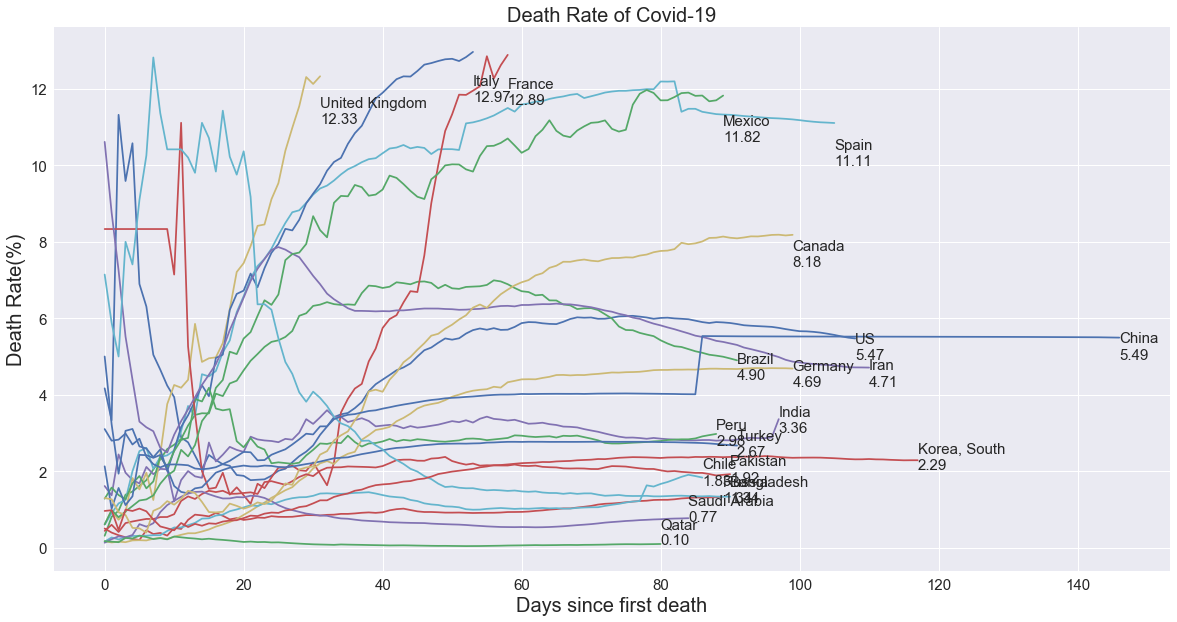

In [40]:
plt.figure(figsize=(20, 10))
for country in v_unique_countries:
    #if country == 'China':
    #    continue
    cases = confirmed_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
    death_cases = deaths_df.loc[deaths_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
    deaths_ratio =[]
    for i, case in enumerate(cases):
        if(0 != cases[i]):
            deaths_ratio.append(death_cases[i] * 100 / cases[i])
    deaths_ratio = [d for d in deaths_ratio if 0 < d < 13]
    adjusted_dates = [i for i in range(len(deaths_ratio))]
    plt.plot(deaths_ratio)
    plt.annotate(xy=[len(deaths_ratio)-1,deaths_ratio[-1] * 0.9], s=country + '\n' + '{:.2f}'.format(deaths_ratio[-1]), size=15)

plt.title('Death Rate of Covid-19', size=20)
plt.xlabel('Days since first death', size=20)
plt.ylabel('Death Rate(%)', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

국가별 사망자 수 추이

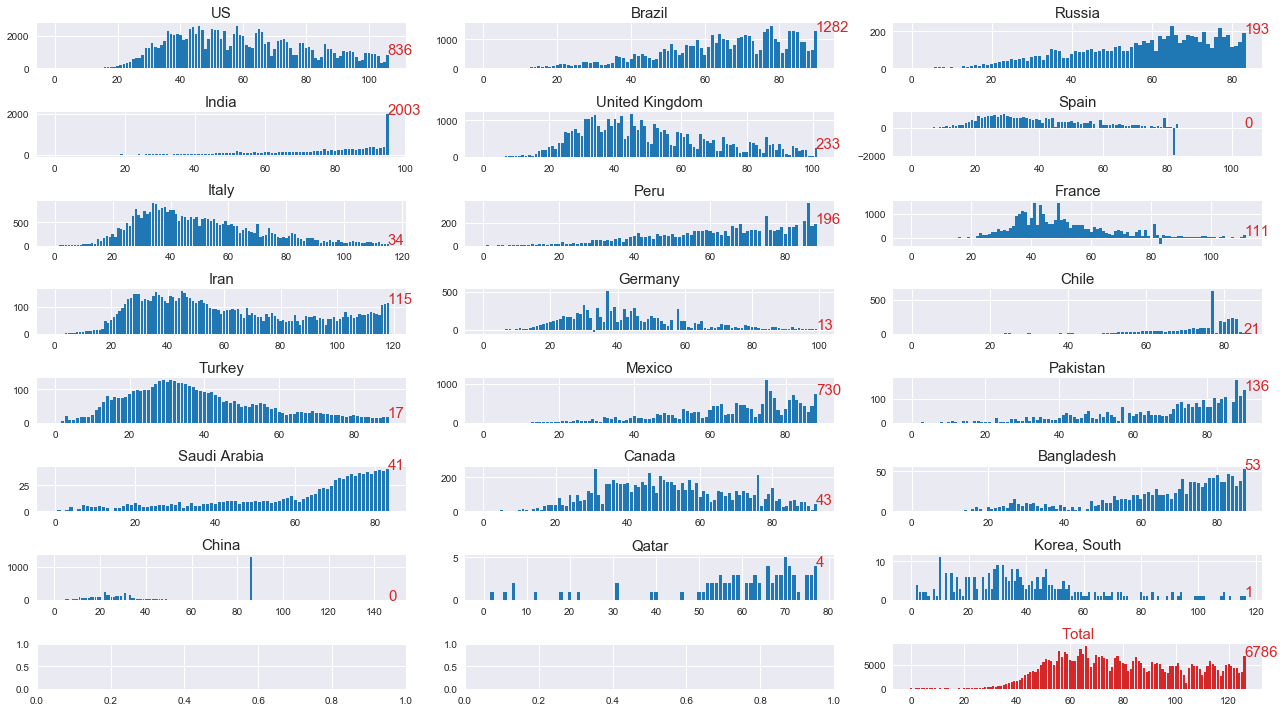

In [41]:
color = 'tab:blue'
fig, axs = plt.subplots(8, 3, figsize=(18, 10))
#fig.suptitle('# of Covid-19 Daily Increase', size=10)
for index, country in enumerate(v_unique_countries):
    cases = deaths_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
    cases = [c for c in cases if c > 1]
    adjusted_dates = [i for i in range(len(cases))]
    new_cases =[0]
    for i, case in enumerate(cases[:-1]):
        new_cases.append(cases[i + 1] - cases[i])
    row, col = divmod(index, 3)
    axs[row, col].bar(adjusted_dates, new_cases, color=color)
    axs[row, col].set_title(country, size=15)
    axs[row, col].text(adjusted_dates[-1], new_cases[-1], new_cases[-1],size=15, color='tab:red')

color = 'tab:red'
total_cases = deaths.sum()
new_cases =[0]
for i, case in enumerate(total_cases[:-1]):
    new_cases.append(total_cases[i + 1] - total_cases[i])
new_cases = new_cases[20:]
adjusted_dates = [i for i in range(len(new_cases))]
axs[7, 2].bar(adjusted_dates, new_cases, color=color)
axs[7, 2].set_title('Total', size=15, color=color)
axs[7, 2].text(adjusted_dates[-1], new_cases[-1], new_cases[-1],size=15, color=color)

fig.tight_layout()

이탈리아 현황

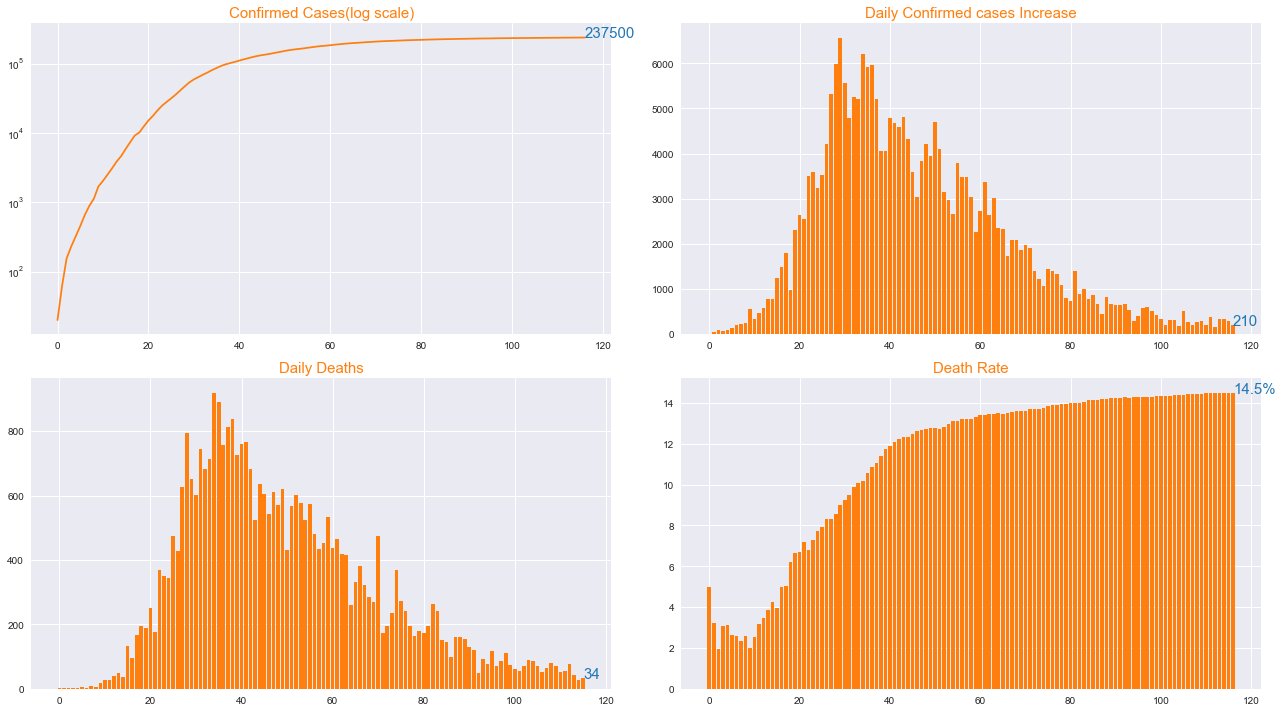

In [42]:
country = 'Italy'
start = 30
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
total_cases = confirmed_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
total_cases = total_cases.values.reshape(len(dates))
total_cases = total_cases[start:]
new_cases =[0]
for i, case in enumerate(total_cases[:-1]):
    new_cases.append(total_cases[i + 1] - total_cases[i])
new_cases = new_cases
color = 'tab:orange'
adjusted_dates = [i for i in range(len(total_cases))]
axs[0, 0].set_yscale('log')
axs[0, 0].plot(adjusted_dates, total_cases, color=color)
axs[0, 0].set_title('Confirmed Cases(log scale)', size=15, color=color)
axs[0, 0].text(adjusted_dates[-1], total_cases[-1], total_cases[-1],size=15, color='tab:blue')

adjusted_dates = [i for i in range(len(new_cases))]
axs[0, 1].bar(adjusted_dates, new_cases, color=color)
axs[0, 1].set_title('Daily Confirmed cases Increase', size=15, color=color)
axs[0, 1].text(adjusted_dates[-1], new_cases[-1], new_cases[-1],size=15, color='tab:blue')

total_deaths = deaths_df.loc[deaths_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
total_deaths = total_deaths.values.reshape(len(dates))
total_deaths = total_deaths[start:]
death_ratios = [(d * 100 / c) for c, d in zip(total_cases, total_deaths)]
total_deaths = [death for death in total_deaths if death > 0]
new_deaths =[]
for i, case in enumerate(total_deaths[:-1]):
    new_deaths.append(total_deaths[i + 1] - total_deaths[i])
adjusted_dates = [i for i in range(len(new_deaths))]
axs[1, 0].bar(adjusted_dates, new_deaths, color=color)
axs[1, 0].set_title('Daily Deaths', size=15, color=color)
axs[1, 0].text(adjusted_dates[-1], new_deaths[-1], new_deaths[-1],size=15, color='tab:blue')

adjusted_dates = [i for i in range(len(death_ratios))]
axs[1, 1].bar(adjusted_dates, death_ratios, color=color)
axs[1, 1].set_title('Death Rate', size=15, color=color)
axs[1, 1].text(adjusted_dates[-1], death_ratios[-1], '{:.1f}%'.format(death_ratios[-1]),size=15, color='tab:blue')

fig.tight_layout()


미국 추이

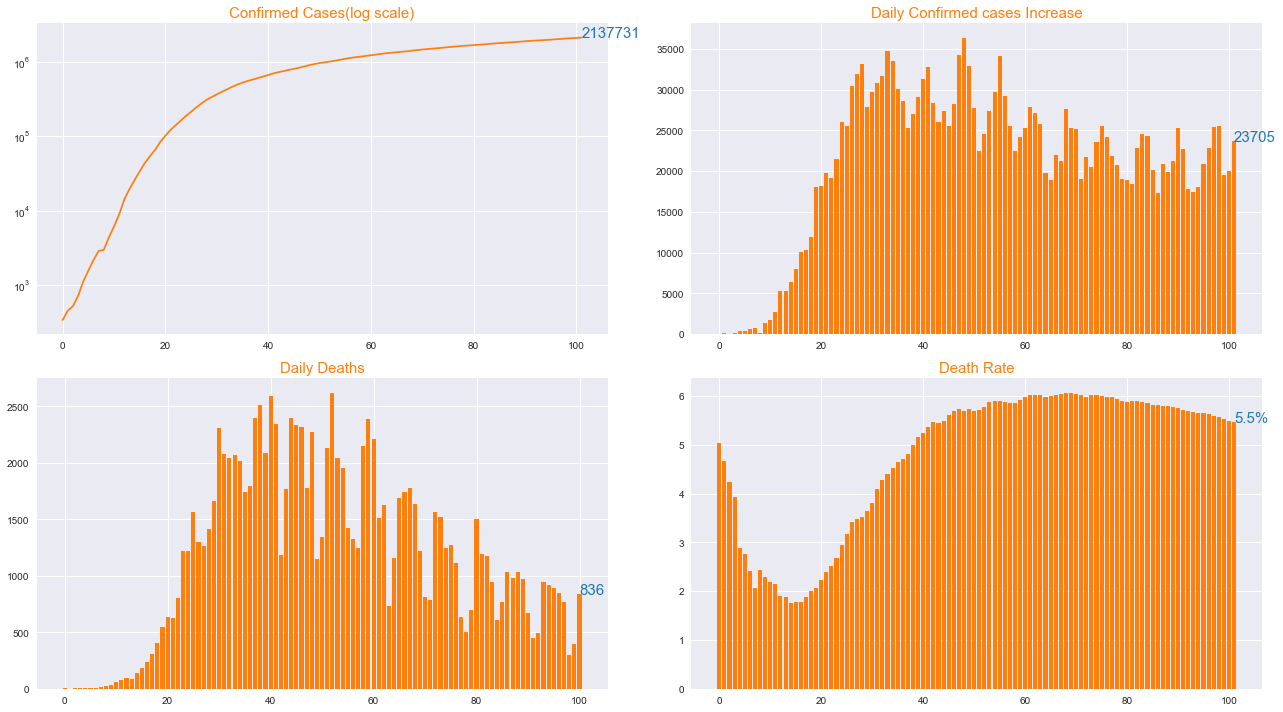

In [43]:
country = 'US'
start = 45
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
total_cases = confirmed_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
total_cases = total_cases.values.reshape(len(dates))
total_cases = total_cases[start:]
new_cases =[0]
for i, case in enumerate(total_cases[:-1]):
    new_cases.append(total_cases[i + 1] - total_cases[i])
new_cases = new_cases
color = 'tab:orange'
adjusted_dates = [i for i in range(len(total_cases))]
axs[0, 0].set_yscale('log')
axs[0, 0].plot(adjusted_dates, total_cases, color=color)
axs[0, 0].set_title('Confirmed Cases(log scale)', size=15, color=color)
axs[0, 0].text(adjusted_dates[-1], total_cases[-1], total_cases[-1],size=15, color='tab:blue')

adjusted_dates = [i for i in range(len(new_cases))]
axs[0, 1].bar(adjusted_dates, new_cases, color=color)
axs[0, 1].set_title('Daily Confirmed cases Increase', size=15, color=color)
axs[0, 1].text(adjusted_dates[-1], new_cases[-1], new_cases[-1],size=15, color='tab:blue')

total_deaths = deaths_df.loc[deaths_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
total_deaths = total_deaths.values.reshape(len(dates))
total_deaths = total_deaths[start:]
death_ratios = [(d * 100 / c) for c, d in zip(total_cases, total_deaths)]
total_deaths = [death for death in total_deaths if death > 0]
new_deaths =[]
for i, case in enumerate(total_deaths[:-1]):
    new_deaths.append(total_deaths[i + 1] - total_deaths[i])
adjusted_dates = [i for i in range(len(new_deaths))]
axs[1, 0].bar(adjusted_dates, new_deaths, color=color)
axs[1, 0].set_title('Daily Deaths', size=15, color=color)
axs[1, 0].text(adjusted_dates[-1], new_deaths[-1], new_deaths[-1],size=15, color='tab:blue')

adjusted_dates = [i for i in range(len(death_ratios))]
axs[1, 1].bar(adjusted_dates, death_ratios, color=color)
axs[1, 1].set_title('Death Rate', size=15, color=color)
axs[1, 1].text(adjusted_dates[-1], death_ratios[-1], '{:.1f}%'.format(death_ratios[-1]),size=15, color='tab:blue')

fig.tight_layout()


3/24/20


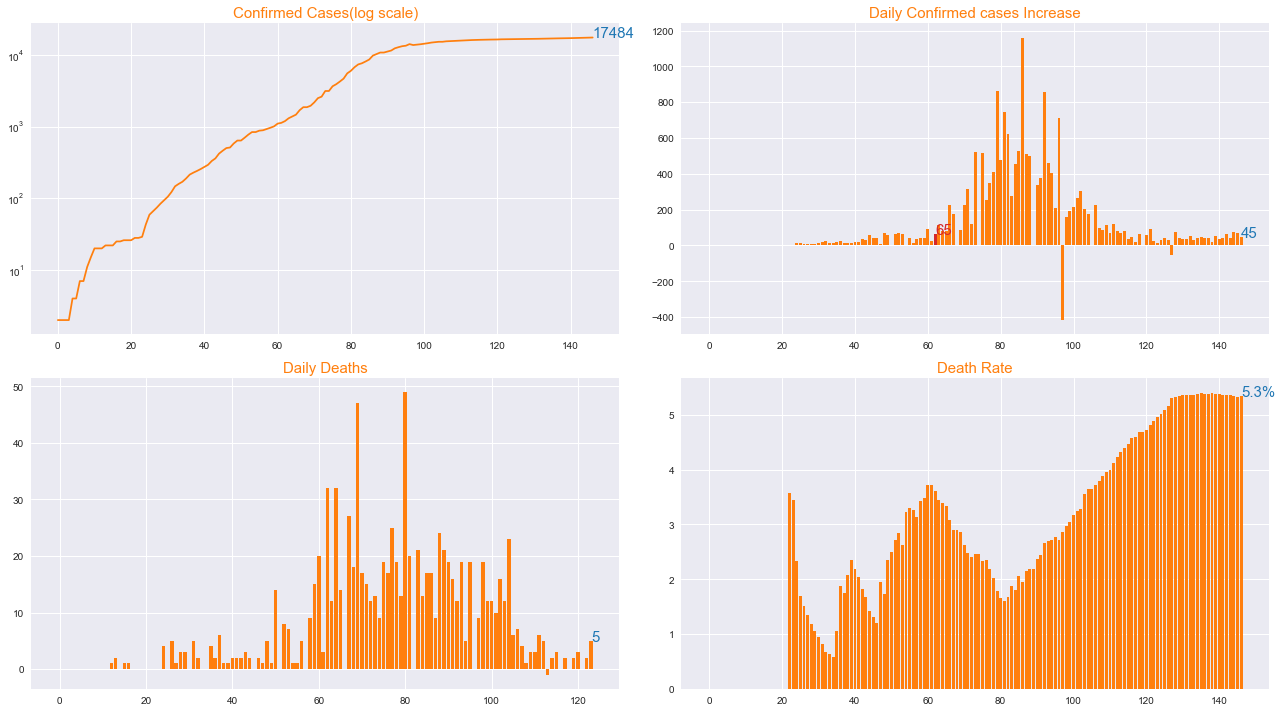

In [44]:
#3/24 올림픽연기 발표
open_idx = date_31 + 35
print(dates[open_idx])
open_date = dates[open_idx]
country = 'Japan'
start = 0
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
total_cases = confirmed_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
total_cases = total_cases.values.reshape(len(dates))

total_cases = total_cases[start:]
new_cases =[0]
for i, case in enumerate(total_cases[:-1]):
    new_cases.append(total_cases[i + 1] - total_cases[i])
new_cases = new_cases
color = 'tab:orange'
adjusted_dates = [i for i in range(len(total_cases))]

axs[0, 0].set_yscale('log')
axs[0, 0].plot(adjusted_dates, total_cases, color=color)
axs[0, 0].set_title('Confirmed Cases(log scale)', size=15, color=color)
axs[0, 0].text(adjusted_dates[-1], total_cases[-1], total_cases[-1],size=15, color='tab:blue')

adjusted_dates = [i for i in range(len(new_cases))]
axs[0, 1].bar(adjusted_dates, new_cases, color=color)
axs[0, 1].bar(adjusted_dates[open_idx], new_cases[open_idx], color='tab:red')
axs[0, 1].set_title('Daily Confirmed cases Increase', size=15, color=color)
axs[0, 1].text(adjusted_dates[-1], new_cases[-1], new_cases[-1],size=15, color='tab:blue')
axs[0, 1].text(adjusted_dates[open_idx], new_cases[open_idx], new_cases[open_idx],size=15, color='tab:red')


total_deaths = deaths_df.loc[deaths_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
total_deaths = total_deaths.values.reshape(len(dates))
total_deaths = total_deaths[start:]
death_ratios = [(d * 100 / c) for c, d in zip(total_cases, total_deaths)]
total_deaths = [death for death in total_deaths if death > 0]
new_deaths =[]
for i, case in enumerate(total_deaths[:-1]):
    new_deaths.append(total_deaths[i + 1] - total_deaths[i])
adjusted_dates = [i for i in range(len(new_deaths))]
axs[1, 0].bar(adjusted_dates, new_deaths, color=color)
axs[1, 0].set_title('Daily Deaths', size=15, color=color)
axs[1, 0].text(adjusted_dates[-1], new_deaths[-1], new_deaths[-1],size=15, color='tab:blue')

adjusted_dates = [i for i in range(len(death_ratios))]
axs[1, 1].bar(adjusted_dates, death_ratios, color=color)
axs[1, 1].set_title('Death Rate', size=15, color=color)
axs[1, 1].text(adjusted_dates[-1], death_ratios[-1], '{:.1f}%'.format(death_ratios[-1]),size=15, color='tab:blue')

fig.tight_layout()

국가별,일별 누적 확진자 그래프(중국 제외)


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 10 Text xticklabel objects>)

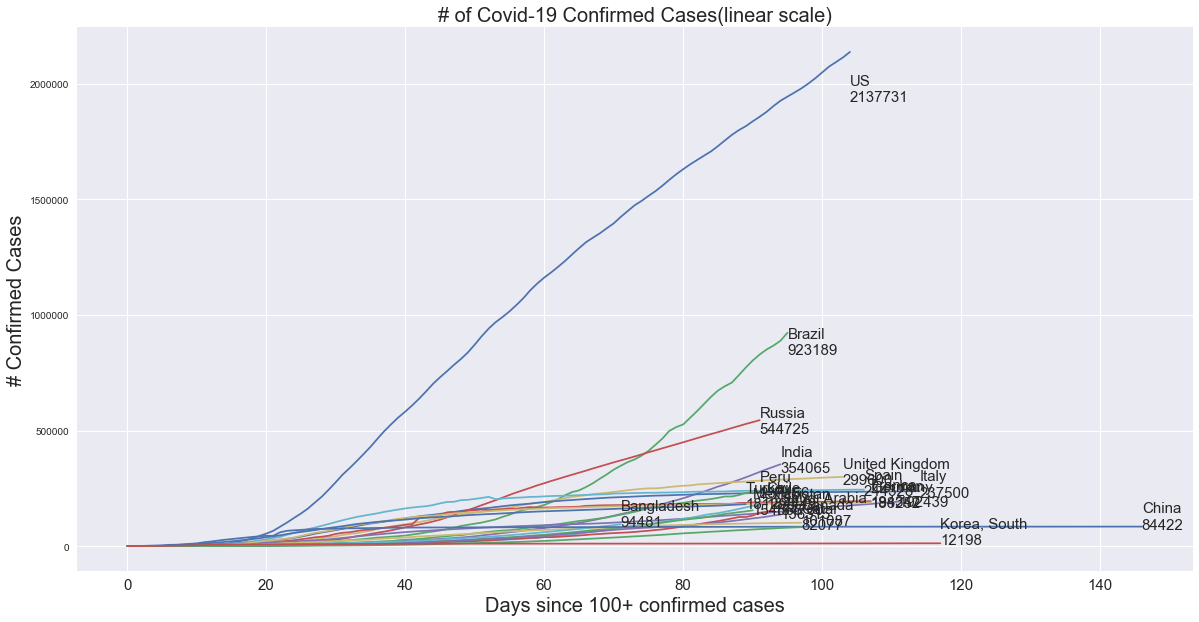

In [47]:
plt.figure(figsize=(20, 10))
for country in v_unique_countries:
    #if country == 'US':
    #    continue
    country_confirmed_cases = confirmed_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
    country_confirmed_cases = country_confirmed_cases.values.reshape(len(dates))
    country_confirmed_cases = [confirmed for confirmed in country_confirmed_cases if confirmed > 100]
    plt.plot(country_confirmed_cases)
    plt.annotate(xy=[len(country_confirmed_cases)-1,country_confirmed_cases[-1] * 0.9], s=country + '\n' + str(country_confirmed_cases[-1]), size=15)

plt.title('# of Covid-19 Confirmed Cases(linear scale)', size=20)
plt.xlabel('Days since 100+ confirmed cases', size=20)
plt.ylabel('# Confirmed Cases', size=20)
plt.xticks(size=15)

확진자 100명 이후 경과일수에 따른 확진자 추이(중국 제외)

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 10 Text xticklabel objects>)

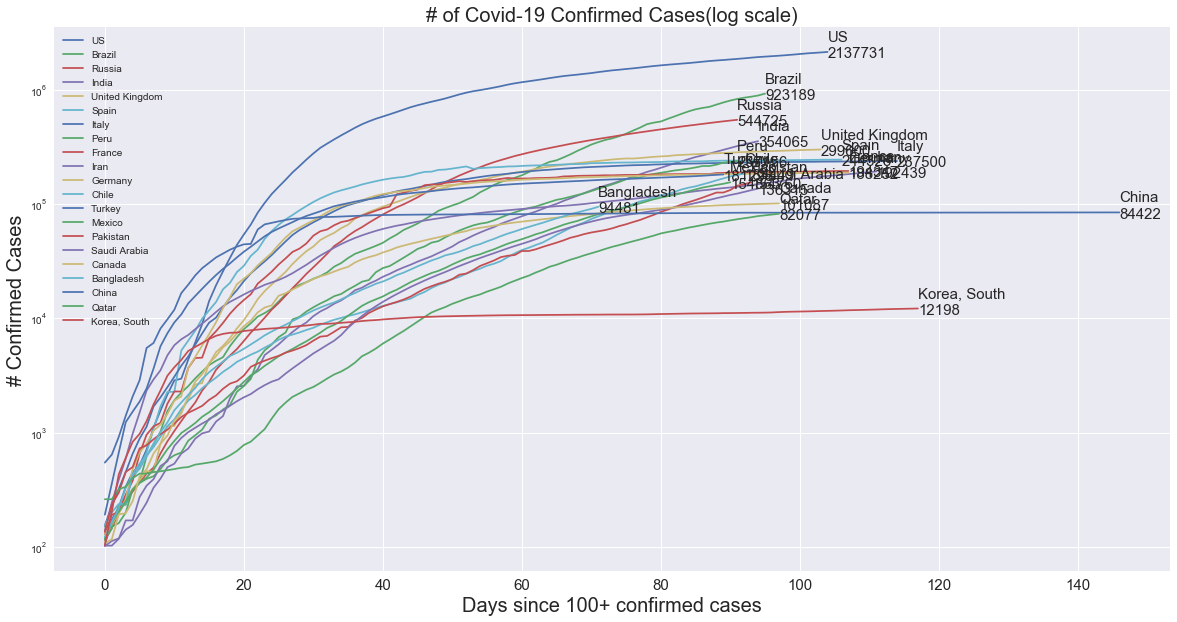

In [50]:
plt.figure(figsize=(20, 10))
plt.yscale('log')
for country in v_unique_countries:
    #if country == 'US':
    #    continue
    country_confirmed_cases = confirmed_df.loc[confirmed_df['Country/Region'] == country, cols[4]:cols[-1]].sum()
    country_confirmed_cases = country_confirmed_cases.values.reshape(len(dates))
    country_confirmed_cases = [confirmed for confirmed in country_confirmed_cases if confirmed > 100]
    plt.plot(country_confirmed_cases)
    plt.annotate(xy=[len(country_confirmed_cases)-1,country_confirmed_cases[-1] * 0.9], s=country + '\n' + str(country_confirmed_cases[-1]), size=15)

plt.title('# of Covid-19 Confirmed Cases(log scale)', size=20)
plt.xlabel('Days since 100+ confirmed cases', size=20)
plt.ylabel('# Confirmed Cases', size=20)
plt.legend(v_unique_countries, loc='upper left')
plt.xticks(size=15)